# Clasificador Bayes Naive

## Importamos las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## Cargamos el df y Preprocesamiento

In [2]:
review = pd.read_csv('datasets/train.csv') 
review_t = pd.read_csv('datasets/test.csv')
review_orig = review_t.copy()
review['sentimiento'] = review['sentimiento'].map({'positivo':1,'negativo':0},na_action=None)
review.drop('ID', axis='columns', inplace=True)
review_t.drop('ID', axis='columns', inplace=True)
review.head()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,Pensé que esta era una manera maravillosa de p...,1
3,"Básicamente, hay una familia donde un niño peq...",0
4,"El ""amor en el tiempo"" de Petter Mattei es una...",1


## Entrenamiento y Prediccion

In [3]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [4]:
target='sentimiento'
review_split=review.drop([target], axis='columns', inplace=False)
sentimientos = review[target].copy()
review_split.head()

,review_es
0,Uno de los otros críticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...
2,Pensé que esta era una manera maravillosa de p...
3,"Básicamente, hay una familia donde un niño peq..."
4,"El ""amor en el tiempo"" de Petter Mattei es una..."


In [5]:
# # Initialize CountVectorizer
# vectorizer = CountVectorizer()
# vectorizer.fit(review_split['review_es'])


# # Define a function to transform each text entry using CountVectorizer
# def transform_text(text):
#     vectorized_text = vectorizer.transform([text])
#     return vectorized_text

# # Apply the transformation to the 'review_es' column
# review_split['review_es'] = review_split['review_es'].apply(transform_text)
# review_split.head()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(review_split, 
                                                    sentimientos, 
                                                    test_size=0.20,  
                                                    random_state=5, )
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(x_train['review_es'].shape)
y_train.shape

40000
10000
40000
10000
(40000,)


(40000,)

In [7]:
#param_grid = {'alpha': [0.1,0.2,0.3,0.4 ,0.5,0.6,0.7,0.8,0.9,1.0], 'fit_prior': [True, False]}
param_grid = {'alpha': np.linspace(0.1,2.1,10) ,'fit_prior': [True, False]}
# Create the Naive Bayes model
model = BernoulliNB()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5,scoring='accuracy')
model2 = make_pipeline(TfidfVectorizer(),grid_search)
model2.fit(x_train['review_es'], y_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
grid_search.cv_results_['mean_test_score']

Best Parameters: {'alpha': 0.3222222222222222, 'fit_prior': False}


array([0.84365 , 0.8437  , 0.84645 , 0.84655 , 0.8465  , 0.846525,
       0.846325, 0.846425, 0.8459  , 0.846   , 0.845525, 0.8457  ,
       0.8455  , 0.8456  , 0.84495 , 0.845175, 0.844475, 0.844575,
       0.843975, 0.843975])

BernoulliNB(alpha=0.3222222222222222, fit_prior=False)
0.84655
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4900
           1       0.87      0.83      0.85      5100

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



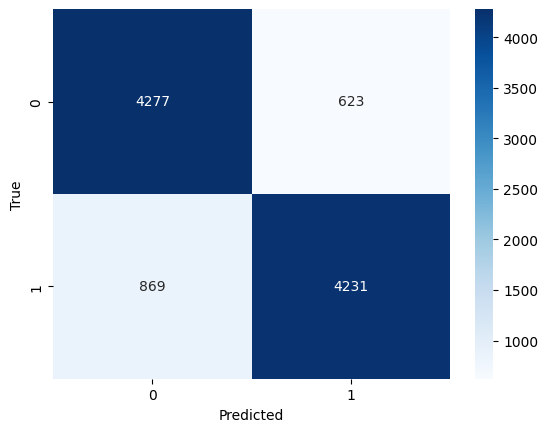

In [8]:
best_tree = grid_search.best_estimator_
print(best_tree)
print(grid_search.best_score_)
model3 = make_pipeline(TfidfVectorizer(),best_tree)
model3.fit(x_train['review_es'], y_train)
y_pred_lin=model3.predict(x_test['review_es'])
metricas(y_pred_lin,y_test)

In [9]:
y_predic = model3.predict(review_t['review_es'])
y_predic_cat = np.where(y_predic>0.5,1,0)
print()

In [10]:
review_orig['sentimiento'] = y_predic_cat
review_orig['sentimiento'] = review_orig['sentimiento'].map({1:'positivo',0:'negativo'},na_action=None)
review_orig.head()

,ID,review_es,sentimiento
0,60000,La mayor virtud de esta película es su existen...,negativo
1,60001,"No soy un experto cinéfilo, pero pocas veces m...",negativo
2,60002,Si no eres un incondicional del humor estilo T...,negativo
3,60003,"No sé qué está pasando, si la gente se deja ll...",negativo
4,60004,"Pero cuando amanece,y me quedo solo,siento en ...",negativo


In [11]:
entregable = pd.DataFrame({'ID': review_orig['ID'], 'sentimiento':review_orig['sentimiento']})

entregable.head()

,ID,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo


In [12]:
entregable.to_csv('bn.csv', index=False)

In [ ]:
import pickle
pickle.dump(model, open("bayes_naive", "wb"))